# Example for usage of tools and configurations
This notebook is an example of how simulation tools, configurations, and reporting can be done harmoniously if a common structure is established. <br>
Note that this structure is commonly seen among large software teams that are constantly co-developing and producing/maintaining production code. <br>

**This notebook represents a report that could be the artifact of an analysis informing science impact of a given parameter.**

## Load dependencies

In [2]:
# import stp_reference_data as stp_config  
# import simulation_tool # Your simulation tool of choice

# load dependencies for this report
import pathlib
import tomlkit
from scipy.optimize import curve_fit
import git
import matplotlib.pyplot as plt
import numpy as np
import psd_utils

Add a line the displays the version of the code being run

In [ ]:
# print(stp_config.__version__)
# print(simulation_tool.__version__)
print(f'{np.__version__=}')
print(f'{psd_utils.__version__=}') # package that isn't setup properly so it doesn't have a version file!

np.__version__='1.26.4'


AttributeError: module 'psd_utils' has no attribute '__version__'

For results that are to be repeated, you should also verify that the repositories being used have not been modified locally

In [ ]:
path_to_cloned_repo = pathlib.Path('/path/to/stp_reference_data')
repo = git.Repo(path_to_cloned_repo,search_parent_directories=True)
dirty = repo.is_dirty()
if dirty:
    print('repo is dirty')

## Load the configuration
Baseline configurations should be stored in external packages so everyone can access them. They can also be used by CI processes that can automatically generate new reports or values and perform analyses when changes to inputs are performed.<br>
Configurations could be stored inside packages (which can be imported) or as cloned repositories.

In [ ]:
import config_calculator as calc_config  # if it's a package

or if it's a local repository

In [ ]:
config_repo = pathlib.Path("/path/to/repo")
config_file = pathlib.Path("_baseline.toml")
# Load the configuration toml file as a dictionary
calc_config = tomlkit.load(config_repo.join(config_file))

In the case of an analysis, multiple configurations can be generated and passed into the analysis tool.<br>
In this example let's consider changing a mirror temperature.

In [13]:
temperatures = [5,10,15, 20] # [Celsius]

Loop over the variable being iterated upon and modify the configuration locally

In [40]:
results={'temp':[],'sim_results':[],'config':[]}
for t in temperatures:
    calc_config["Temperature"]=t
    run_result = simulation_tool(config=calc_config)
    results['config'].append(calc_config)
    results['temp'].append(t)
    results['sim_results'].append(run_result)

In [19]:
print(results["temp"])

[5, 10, 15, 20]


## Perform some analysis
For example, one could fit a line to some result

Define the function for a straight line 

In [22]:
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

In [ ]:
x=results['temp']
y=results["sim_results"]["beaver_dams"]

/var/folders/tn/c8b1spn5203g99yfgnhp6c740000h0/T/ipykernel_59228/4199506930.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(f, x, y) # your data x, y to fit


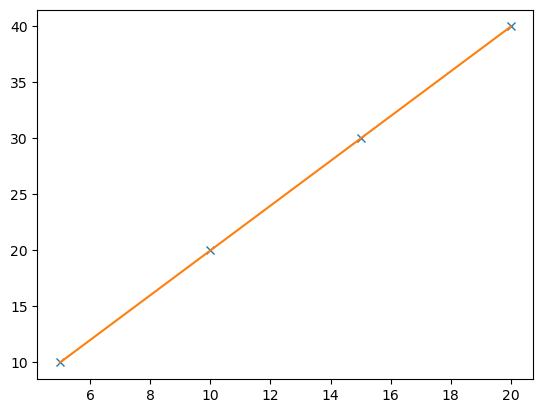

In [42]:
popt, pcov = curve_fit(f, x, y) # your data x, y to fit
plt.plot(x,y,'x')
plt.plot(np.float64(x),f(np.float64(x),popt[0],popt[1]),'-')

## Report the take-home points in an obvious manner

In [46]:
print(f"The relationship between the temperature and beaver dams of demonstrates that climate change will increase beaver dams by {popt[0]:0.2f} per degree Celsius rise in temperature.")

The relationship between the temperature and beaver dams of demonstrates that climate change will increase beaver dams by 2.00 per degree Celsius rise in temperature.
